# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
cities = []
# Try generating at more than 500 cities
while len(cities) <= 500:
    # List for holding lat_lngs and cities
    lat_lngs = []
    cities = []

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
    lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

    # Print the city count to confirm sufficient count
    cities_count = len(cities)
    if cities_count <=500:
        print(f"Only {cities_count} cities generated, will try again to get 500+ cities")
    else:
        print(f"{cities_count} cities generated")

612 cities generated


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# setting up a dataframe
weather_df = pd.DataFrame({"City_ID": np.arange(0, cities_count, 1),
                           "City": cities
                          })
# initializing variables

city_record = 0
city_set = 1
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Datetime"] = ""
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""


print("Beginning Data Retrieval \n -----------------------------")

# loop through the city list, each 50 cities a time to perform API calls
for index, row in weather_df.iterrows():
    
    # counting city if city number reach 50 in a set, change set number
    city_record += 1
    if (city_record % 50 == 1) and (city_record != 1):
        city_set += 1
        print("Waiting for next set of request")
        time.sleep(60)
            
    city = row["City"]
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&units=metric"+ "&q=" + city
    
    print(f"Processing Record {city_record} of Set {city_set} | {city.title()}")
    
    response = requests.get(query_url) 
    result = response.json()
    try:
        weather_df.loc[index , "Cloudiness"] = result["clouds"]["all"]
        weather_df.loc[index , "Country"] = result["sys"]["country"]
        weather_df.loc[index , "Datetime"] = result["dt"]
        weather_df.loc[index , "Humidity"] = result["main"]["humidity"]
        weather_df.loc[index , "Lat"] = result["coord"]["lat"]
        weather_df.loc[index , "Lng"] = result["coord"]["lon"]
        weather_df.loc[index , "Max Temp"] =result["main"]["temp_max"]
        weather_df.loc[index , "Wind Speed"] = result["wind"]["speed"]
    except:
        print(f"      Insufficient data, skipping record {city_record} of Set {city_set}")
        pass

print("Requests/Extraction completed!")

Beginning Data Retrieval 
 -----------------------------
Processing Record 1 of Set 1 | Bredasdorp
Processing Record 2 of Set 1 | Hay River
Processing Record 3 of Set 1 | Islahiye
Processing Record 4 of Set 1 | Busselton
Processing Record 5 of Set 1 | Port Macquarie
Processing Record 6 of Set 1 | Ushuaia
Processing Record 7 of Set 1 | Hobart
Processing Record 8 of Set 1 | East London
Processing Record 9 of Set 1 | Urusha
Processing Record 10 of Set 1 | Segou
Processing Record 11 of Set 1 | Lompoc
Processing Record 12 of Set 1 | Vardo
Processing Record 13 of Set 1 | Nikolskoye
Processing Record 14 of Set 1 | Port Elizabeth
Processing Record 15 of Set 1 | Torbay
Processing Record 16 of Set 1 | Thompson
Processing Record 17 of Set 1 | Rikitea
Processing Record 18 of Set 1 | Barrow
Processing Record 19 of Set 1 | San Cristobal
Processing Record 20 of Set 1 | Zheleznodorozhnyy
Processing Record 21 of Set 1 | Gat
Processing Record 22 of Set 1 | Punta Arenas
Processing Record 23 of Set 1 | Ba

Processing Record 181 of Set 4 | Ulaanbaatar
Processing Record 182 of Set 4 | Guaraniacu
Processing Record 183 of Set 4 | Khatanga
Processing Record 184 of Set 4 | Komsomolskiy
Processing Record 185 of Set 4 | Chumikan
Processing Record 186 of Set 4 | Kadykchan
      Insufficient data, skipping record 186 of Set 4
Processing Record 187 of Set 4 | Mbandaka
Processing Record 188 of Set 4 | Port Hueneme
Processing Record 189 of Set 4 | Kavieng
Processing Record 190 of Set 4 | Uyuni
Processing Record 191 of Set 4 | Talnakh
Processing Record 192 of Set 4 | New Norfolk
Processing Record 193 of Set 4 | Balabac
Processing Record 194 of Set 4 | Tazovskiy
Processing Record 195 of Set 4 | De-Kastri
Processing Record 196 of Set 4 | Peachland
Processing Record 197 of Set 4 | Sebaco
Processing Record 198 of Set 4 | Kargat
Processing Record 199 of Set 4 | Belyy Yar
Processing Record 200 of Set 4 | Bathsheba
Waiting for next set of request
Processing Record 201 of Set 5 | Hualmay
Processing Record 202

Waiting for next set of request
Processing Record 351 of Set 8 | Sao Felix Do Xingu
Processing Record 352 of Set 8 | Porto Seguro
Processing Record 353 of Set 8 | Fomboni
Processing Record 354 of Set 8 | Narsaq
Processing Record 355 of Set 8 | Bacalar
Processing Record 356 of Set 8 | Adrar
Processing Record 357 of Set 8 | Zima
Processing Record 358 of Set 8 | Kimbe
Processing Record 359 of Set 8 | Nouadhibou
Processing Record 360 of Set 8 | Laguna
Processing Record 361 of Set 8 | Vila Praia De Ancora
Processing Record 362 of Set 8 | Atar
Processing Record 363 of Set 8 | Shebalino
Processing Record 364 of Set 8 | Batagay-Alyta
Processing Record 365 of Set 8 | Filadelfia
Processing Record 366 of Set 8 | Airai
Processing Record 367 of Set 8 | Deep River
Processing Record 368 of Set 8 | Havoysund
Processing Record 369 of Set 8 | Termiz
Processing Record 370 of Set 8 | Namibe
Processing Record 371 of Set 8 | Takoradi
Processing Record 372 of Set 8 | Mandera
Processing Record 373 of Set 8 | 

Processing Record 526 of Set 11 | Salme
Processing Record 527 of Set 11 | Acajutla
Processing Record 528 of Set 11 | Parintins
Processing Record 529 of Set 11 | Ahuimanu
Processing Record 530 of Set 11 | Greystones
Processing Record 531 of Set 11 | Bolungarvik
      Insufficient data, skipping record 531 of Set 11
Processing Record 532 of Set 11 | Diamantino
Processing Record 533 of Set 11 | Jinchang
Processing Record 534 of Set 11 | Cabedelo
Processing Record 535 of Set 11 | Port-Gentil
Processing Record 536 of Set 11 | Impfondo
Processing Record 537 of Set 11 | Fort Nelson
Processing Record 538 of Set 11 | San Francisco
Processing Record 539 of Set 11 | Cerritos
Processing Record 540 of Set 11 | Keuruu
Processing Record 541 of Set 11 | Kachiry
Processing Record 542 of Set 11 | Pocone
Processing Record 543 of Set 11 | Seoul
Processing Record 544 of Set 11 | Oranjemund
Processing Record 545 of Set 11 | Mabaruma
Processing Record 546 of Set 11 | Farmington
Processing Record 547 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
backup_data = weather_df

# Remove skipped/empty record
weather_df = weather_df.replace("", np.nan)
weather_df = weather_df.dropna()

# Convert data content to suitable data types
weather_df["Cloudiness"] = weather_df["Cloudiness"].astype(int)
weather_df["Datetime"] = weather_df["Datetime"].astype(int)
weather_df["Humidity"] = weather_df["Humidity"].astype(int)
weather_df["Lat"] = weather_df["Lat"].astype(float)
weather_df["Lng"] = weather_df["Lng"].astype(float)
weather_df["Max Temp"] = weather_df["Max Temp"].astype(float)
weather_df["Wind Speed"] = weather_df["Wind Speed"].astype(float)

In [5]:
# Write DataFrame to csv
weather_df.to_csv(output_data_file, index = False)
print("The weather DataFrame was exported to CitiesWeather.csv successfully!")

The weather DataFrame was exported to CitiesWeather.csv successfully!


In [6]:
weather_df

,City_ID,City,Cloudiness,Country,Datetime,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,bredasdorp,100,ZA,1639906515,64,-34.5322,20.0403,25.71,3.60
1,1,hay river,75,CA,1639906516,76,60.8156,-115.7999,-26.01,2.06
2,2,islahiye,100,TR,1639906516,95,37.0250,36.6306,7.88,1.29
3,3,busselton,0,AU,1639906517,50,-33.6500,115.3333,27.27,5.99
4,4,port macquarie,97,AU,1639906518,84,-31.4333,152.9167,25.98,6.54
...,...,...,...,...,...,...,...,...,...,...
607,607,thinadhoo,74,MV,1639907687,74,0.5333,72.9333,27.48,1.83
608,608,charters towers,0,AU,1639907687,65,-20.1000,146.2667,26.07,9.01
609,609,alanya,99,TR,1639907688,65,36.5438,31.9998,10.07,11.00
610,610,anloga,81,GH,1639907689,45,5.7947,0.8973,27.12,4.02


In [7]:
weather_df.describe()

,City_ID,Cloudiness,Datetime,Humidity,Lat,Lng,Max Temp,Wind Speed
count,566.000000,566.000000,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000
mean,304.653710,60.814488,1.639907e+09,72.614841,20.279056,15.870078,10.951272,3.499912
std,177.334653,38.275192,3.530415e+02,22.095851,32.782491,90.314660,17.883874,2.636987
min,0.000000,0.000000,1.639906e+09,8.000000,-54.800000,-175.200000,-46.010000,0.000000
25%,148.250000,20.000000,1.639907e+09,63.000000,-6.824475,-61.610550,-0.140000,1.540000
50%,308.500000,75.000000,1.639907e+09,78.000000,22.839750,19.505250,17.405000,2.875000
75%,455.750000,98.000000,1.639907e+09,89.000000,47.976925,92.246025,24.952500,4.715000
max,611.000000,100.000000,1.639908e+09,100.000000,78.218600,178.416700,39.750000,16.460000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

if weather_df["Humidity"].max() > 100:
    outliner_weather_df = weather_df.loc[weather_df["Humidity"] > 100]
    weather_df = weather_df.loc[weather_df["Humidity"] <= 100]
    print(f"{len(outliner_weather_df)} cities that have humidity >100%")
    print("A clean DataFrame was created from dropping all outliners")
else:
    print("No cities that have humidity >100%")

No cities that have humidity >100%


In [9]:
weather_df

,City_ID,City,Cloudiness,Country,Datetime,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,bredasdorp,100,ZA,1639906515,64,-34.5322,20.0403,25.71,3.60
1,1,hay river,75,CA,1639906516,76,60.8156,-115.7999,-26.01,2.06
2,2,islahiye,100,TR,1639906516,95,37.0250,36.6306,7.88,1.29
3,3,busselton,0,AU,1639906517,50,-33.6500,115.3333,27.27,5.99
4,4,port macquarie,97,AU,1639906518,84,-31.4333,152.9167,25.98,6.54
...,...,...,...,...,...,...,...,...,...,...
607,607,thinadhoo,74,MV,1639907687,74,0.5333,72.9333,27.48,1.83
608,608,charters towers,0,AU,1639907687,65,-20.1000,146.2667,26.07,9.01
609,609,alanya,99,TR,1639907688,65,36.5438,31.9998,10.07,11.00
610,610,anloga,81,GH,1639907689,45,5.7947,0.8973,27.12,4.02


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
# Getting the today date
now = datetime.today()
current_date = now.strftime("%d/%m/%y")

In [11]:
# Setting up a function to plot scatter from DataFrame
def plot_scatter(df, x, y, xlab, ylab, hemisphere): 
    
    # remove unit of measurement from ylabel
    if hemisphere == "":
        xlabelconvert = xlab
        ylabelconvert = ' '.join(ylab.split()[0:-1])
    else:
        xlabelconvert = ' '.join(xlab.split()[0:-1])
        ylabelconvert = ylab
    
    # show plot title depending on if linregress is required
    title = f"City {xlabelconvert} vs {ylabelconvert}"
    if hemisphere != "":
        title = f"{hemisphere} hemisphere - {title} Linear Regression"
    else:
        title = f"{title} ({current_date})"
        
    df.plot(x, y, kind = "scatter", xlabel = xlab, ylabel = ylab, 
                    title = title, 
                    grid = True, edgecolor = "black")
    
    if hemisphere != "":
        (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
        equation = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
        x_axis = np.arange(df[x].min(), df[x].max(), 1)
        y_axis = [slope * x_value + intercept for x_value in x_axis]
        plt.plot(x_axis, y_axis, color = "red")
        
        # set x, y location for equation line
        x_equation = (df[x].max() - df[x].min()) / 4 + df[x].min()
        y_equation = (df[y].max() - df[y].min()) / 4 + df[y].min()
        plt.annotate(equation, (x_equation, y_equation) , color = "red", fontsize = 15)
        print(f"The r-value is {rvalue}")

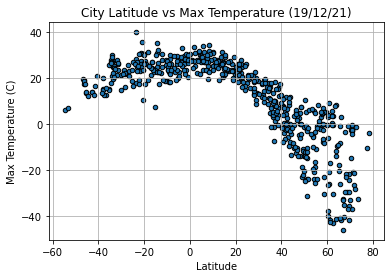

In [12]:
plot_scatter(weather_df, "Lat", "Max Temp", "Latitude", "Max Temperature (C)","")
plt.savefig("./output_data/fig1.png")

## Latitude vs. Humidity Plot

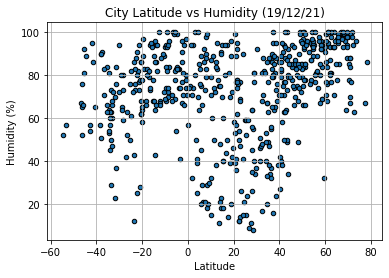

In [13]:
plot_scatter(weather_df,"Lat", "Humidity", "Latitude", "Humidity (%)","")
plt.savefig("./output_data/fig2.png")

## Latitude vs. Cloudiness Plot

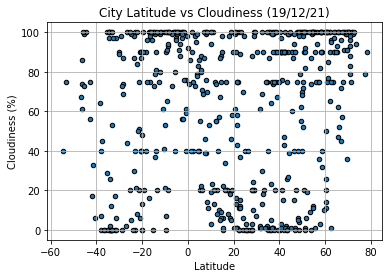

In [14]:
plot_scatter(weather_df, "Lat", "Cloudiness", "Latitude", "Cloudiness (%)", "")
plt.savefig("./output_data/fig3.png")

## Latitude vs. Wind Speed Plot

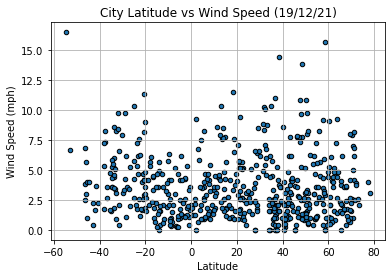

In [15]:
plot_scatter(weather_df, "Lat", "Wind Speed", "Latitude", "Wind Speed (mph)", "")
plt.savefig("./output_data/fig4.png")

## Linear Regression

In [16]:
# Devide DataFrame to Northern and Southern Hemisphere DataFrame

northern_hemi_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemi_df = weather_df.loc[weather_df["Lat"] < 0]

In [17]:
northern_hemi_df

,City_ID,City,Cloudiness,Country,Datetime,Humidity,Lat,Lng,Max Temp,Wind Speed
1,1,hay river,75,CA,1639906516,76,60.8156,-115.7999,-26.01,2.06
2,2,islahiye,100,TR,1639906516,95,37.0250,36.6306,7.88,1.29
8,8,urusha,100,RU,1639906521,100,54.0500,122.9000,-23.75,0.92
9,9,segou,10,ML,1639906522,11,13.4317,-6.2157,28.80,7.53
10,10,lompoc,1,US,1639906523,86,34.6391,-120.4579,11.07,1.54
...,...,...,...,...,...,...,...,...,...,...
603,603,gimli,100,CA,1639907684,78,50.6336,-96.9907,-14.20,9.77
607,607,thinadhoo,74,MV,1639907687,74,0.5333,72.9333,27.48,1.83
609,609,alanya,99,TR,1639907688,65,36.5438,31.9998,10.07,11.00
610,610,anloga,81,GH,1639907689,45,5.7947,0.8973,27.12,4.02


In [18]:
southern_hemi_df 

,City_ID,City,Cloudiness,Country,Datetime,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,bredasdorp,100,ZA,1639906515,64,-34.5322,20.0403,25.71,3.60
3,3,busselton,0,AU,1639906517,50,-33.6500,115.3333,27.27,5.99
4,4,port macquarie,97,AU,1639906518,84,-31.4333,152.9167,25.98,6.54
5,5,ushuaia,40,AR,1639906519,52,-54.8000,-68.3000,5.81,16.46
6,6,hobart,75,AU,1639906227,57,-42.8794,147.3294,13.92,0.45
...,...,...,...,...,...,...,...,...,...,...
600,600,gobabis,8,NA,1639907681,25,-22.4500,18.9667,30.42,6.22
604,604,conceicao do araguaia,100,BR,1639907684,96,-8.2578,-49.2647,23.28,1.50
605,605,forbes,100,AU,1639907685,68,-33.3833,148.0167,20.51,5.07
606,606,tautira,96,PF,1639907686,80,-17.7333,-149.1500,25.01,6.04


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8555568835258242


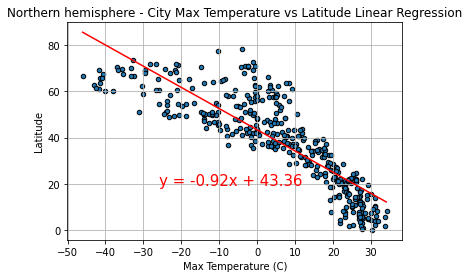

In [19]:
plot_scatter(northern_hemi_df, "Max Temp", "Lat", "Max Temperature (C)" , "Latitude", "Northern")
plt.savefig("./output_data/fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.4897325323009636


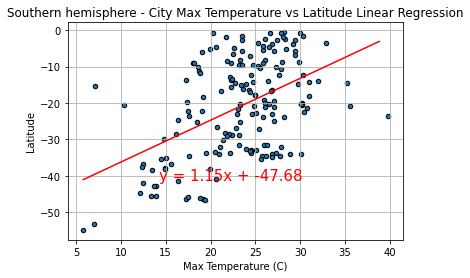

In [20]:
plot_scatter(southern_hemi_df, "Max Temp", "Lat", "Max Temperature (C)" , "Latitude", "Southern")
plt.savefig("./output_data/fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.4634438876238277


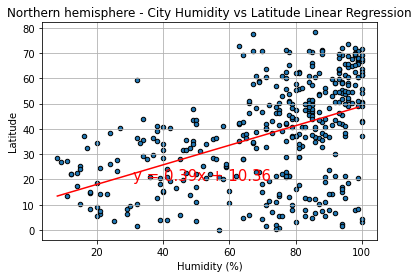

In [21]:
plot_scatter(northern_hemi_df, "Humidity", "Lat", "Humidity (%)" , "Latitude", "Northern")
plt.savefig("./output_data/fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.33693052983416866


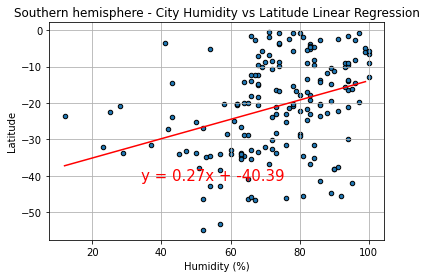

In [22]:
plot_scatter(southern_hemi_df, "Humidity", "Lat", "Humidity (%)" , "Latitude", "Southern")
plt.savefig("./output_data/fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.26458790697438483


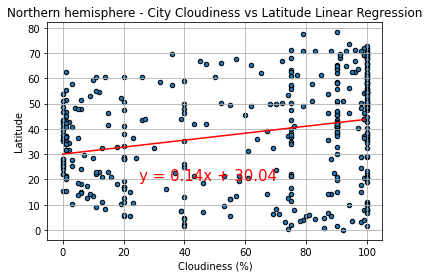

In [23]:
plot_scatter(northern_hemi_df, "Cloudiness", "Lat", "Cloudiness (%)" , "Latitude", "Northern")
plt.savefig("./output_data/fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.33097980137701005


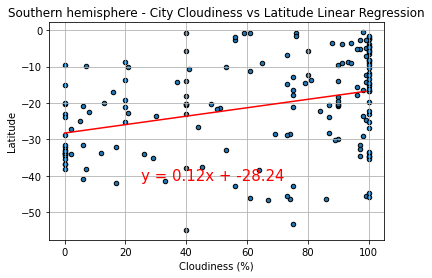

In [24]:
plot_scatter(southern_hemi_df, "Cloudiness", "Lat", "Cloudiness (%)" , "Latitude", "Southern")
plt.savefig("./output_data/fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.00995144889222386


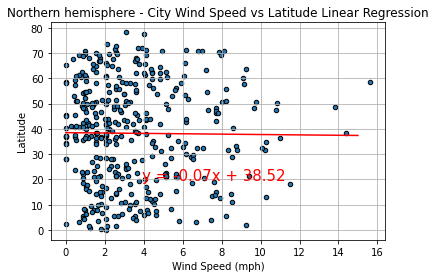

In [25]:
plot_scatter(northern_hemi_df, "Wind Speed", "Lat", "Wind Speed (mph)" , "Latitude", "Northern")
plt.savefig("./output_data/fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.37530519553266634


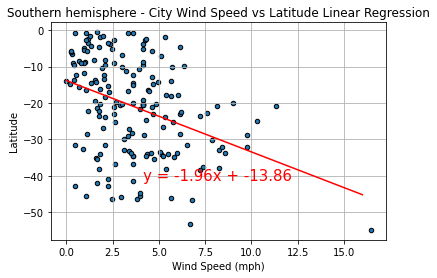

In [26]:
plot_scatter(southern_hemi_df, "Wind Speed", "Lat", "Wind Speed (mph)" , "Latitude", "Southern")
plt.savefig("./output_data/fig12.png")